# SNS injection painting

In [1]:
from os import listdir
from os.path import join
import sys
import numpy as np
from matplotlib import pyplot as plt, animation
from tqdm import tqdm, trange
import proplot as plot 

sys.path.append('/Users/46h/Research/code/accphys/')
from tools import plotting as myplt
from tools import animation as myanim
from tools import utils

plot.rc['animation.html'] = 'jshtml'
plot.rc['savefig.dpi'] = 'figure'
plot.rc['figure.facecolor'] = 'white'
plot.rc['axes.grid'] = False

## Injection region closed orbit

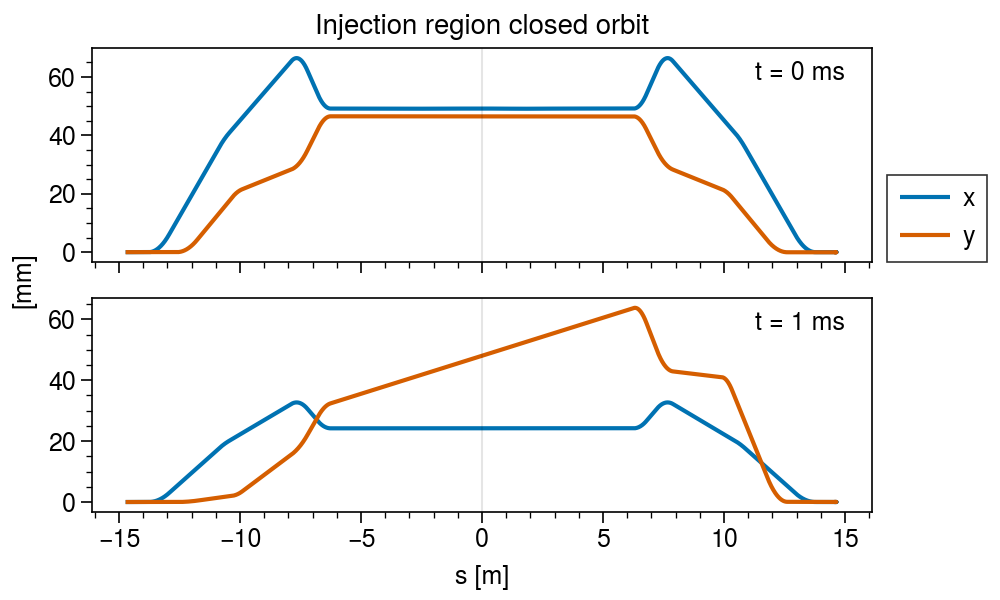

In [2]:
inj_region_coords_t0 = np.load('_output/data/inj_region_coords_t0.npy')
inj_region_coords_t1 = np.load('_output/data/inj_region_coords_t1.npy')
inj_region_positions_t0 = np.load('_output/data/inj_region_positions_t0.npy')
inj_region_positions_t1 = np.load('_output/data/inj_region_positions_t1.npy')
inj_region_positions_t0 -= 0.5 * inj_region_positions_t0[-1]
inj_region_positions_t1 -= 0.5 * inj_region_positions_t1[-1]

fig, axes = plot.subplots(nrows=2, figsize=(5, 3))
axes[0].plot(inj_region_positions_t0, inj_region_coords_t0[:, 0])
axes[0].plot(inj_region_positions_t0, inj_region_coords_t0[:, 2])
axes[1].plot(inj_region_positions_t1, inj_region_coords_t1[:, 0])
axes[1].plot(inj_region_positions_t1, inj_region_coords_t1[:, 2])
axes[0].format(title='Injection region closed orbit')
axes[0].legend(labels=('x', 'y'), ncols=1, loc=(1.02, 0));
for i, ax in enumerate(axes):
    ax.axvline(0, c='k', lw=0.75, alpha=0.1)
    ax.annotate('t = {} ms'.format(i), xy=(0.85, 0.85), xycoords='axes fraction')
axes.format(xlabel='s [m]', ylabel='[mm]') 
plt.savefig('_output/figures/inj_region_closed_orbit.png', facecolor='white', dpi=500)

## Kicker strengths

In [3]:
kicker_angles_t0 = np.loadtxt('_output/data/kicker_angles_t0.dat')
kicker_angles_t1 = np.loadtxt('_output/data/kicker_angles_t1.dat')
kicker_names = ['ikickh_a10', 'ikickv_a10', 'ikickh_a11', 'ikickv_a11',
                'ikickv_a12', 'ikickh_a12', 'ikickv_a13', 'ikickh_a13']

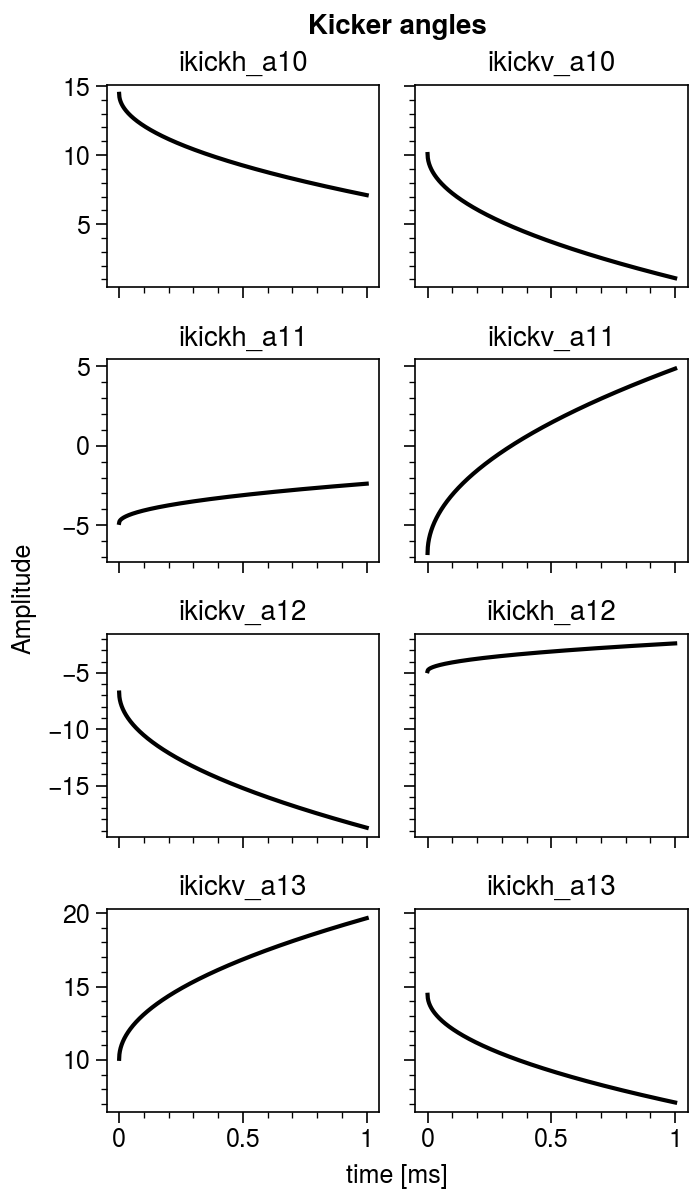

In [4]:
def waveform(t, k0, k1):
    return k0 - (k0 - k1)*np.sqrt(t)

t = np.linspace(0, 1, 1000)

fig, axes = plot.subplots(nrows=4, ncols=2, figsize=(3.5, 6))
for k0, k1, name, ax in zip(kicker_angles_t0, kicker_angles_t1, kicker_names, axes):
    ax.plot(t, 1000 * waveform(t, k0, k1), c='k')
    ax.format(title=name)
axes.format(ylabel='Amplitude', suptitle='Kicker angles', xlabel='time [ms]')
plt.savefig('_output/figures/kicker_angles.png', facecolor='w', dpi=500)

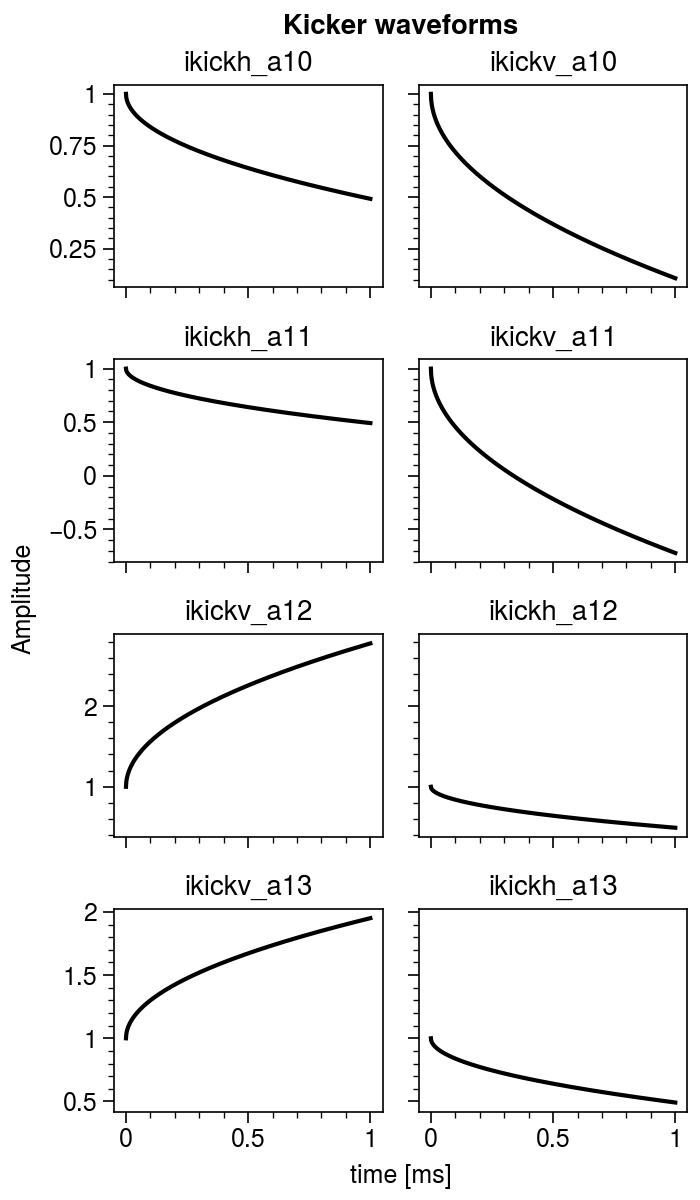

In [5]:
fig, axes = plot.subplots(nrows=4, ncols=2, figsize=(3.5, 6))
for k0, k1, name, ax in zip(kicker_angles_t0, kicker_angles_t1, kicker_names, axes):
    ax.plot(t, waveform(t, 1.0, k1/k0), c='k')
    ax.format(title=name)
axes.format(ylabel='Amplitude', suptitle='Kicker waveforms', xlabel='time [ms]')
plt.savefig('_output/figures/kicker_waveforms.png', facecolor='w', dpi=500)

## TBT coordinates 

In [6]:
files = utils.list_files('_output/data/')
files = [file for file in files if 'X' in file]
files = sorted(files, key=lambda file: int(file.split('.npy')[0].split('_')[1]))
files = [join('_output/data/', file) for file in files]
coords = [np.load(file) for file in files]

foil_pos = (49.2, 46.8)
coords_foil_frame = []
for X in coords:
    Y = np.copy(X)
    Y[:, 0] -= foil_pos[0]
    Y[:, 2] -= foil_pos[1]
    coords_foil_frame.append(Y)

In [43]:
Sigma = np.cov(coords[-1].T)
rms_energy_spread_GeV = Sigma[5, 5] * 1e3
rms_energy_spread_GeV

0.01681859100036204

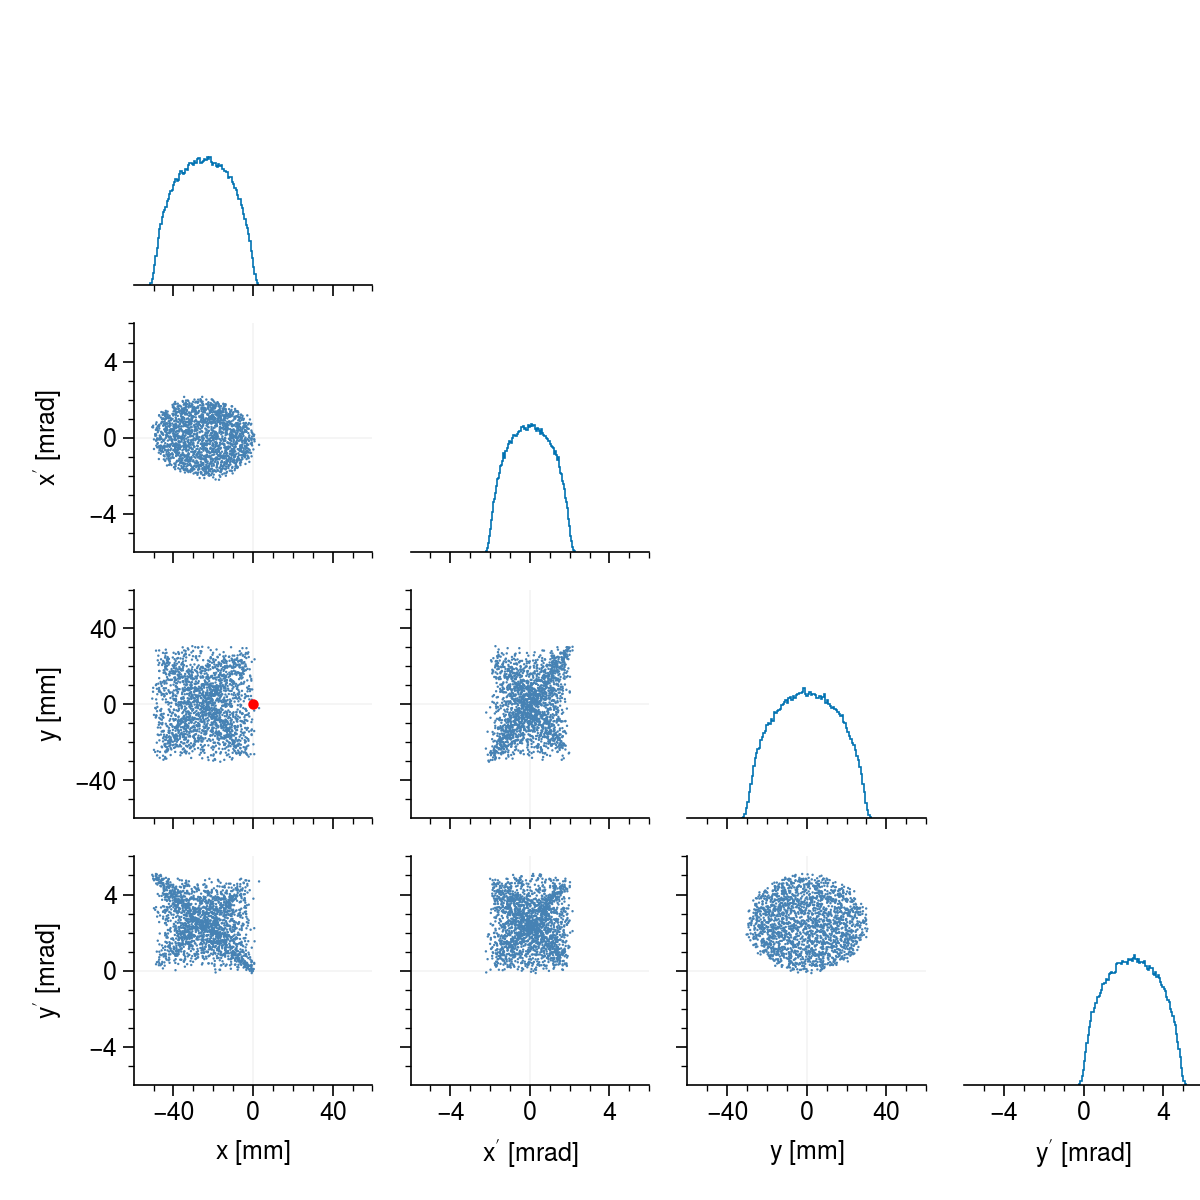

In [10]:
limits = (60, 6)
axes = myplt.corner(coords_foil_frame[-1], limits=limits)

axes[2, 0].scatter(0, 0, c='r', s=10, zorder=99);
for i in range(1, 4):
    for j in range(i):
        axes[i, j].axvline(0, c='k', lw=0.75, alpha=0.04, zorder=0)
        axes[i, j].axhline(0, c='k', lw=0.75, alpha=0.04, zorder=0)
# plt.savefig('_output/figures/corner.png', facecolor='w', dpi=300)

In [9]:
anim = myanim.corner(coords_foil_frame, skip=9, samples=5000, limits=(30, 3), text_fmt='Turn {}', fps=13)
anim

The cell below saves a high quality gif by calling `myplt.corner` a bunch of times. It is easy but pretty slow.

In [ ]:
# import gif
# gif.options.matplotlib["dpi"] = 300

# turns = np.arange(0, len(coords))

# @gif.frame
# def getframe(i):
#     axes = myplt.corner(coords_foil_frame[i], limits=(80, 6), 
#                         text='Turn = {}'.format(turns[i]))
#     axes[2, 0].scatter(0, 0, c='r', s=10, zorder=99);
#     return axes

# frames = []
# for i in trange(0, 1000, 10):
#     frame = getframe(i)
#     frames.append(frame)
    
# gif.save(frames, '_output/figures/example.gif', duration=7.0, unit="s", between="startend")